In [118]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [30]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [31]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [32]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [33]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [34]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [35]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [36]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [37]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [38]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [39]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [40]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [41]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [42]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [43]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [44]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [45]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [46]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [47]:
urban_ride_count =  urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [48]:
suburban_ride_count =  suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count =  rural_cities_df.groupby(["city"]).count()["ride_id"]


In [49]:
urban_avg_fare =  urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare =  suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare =  rural_cities_df.groupby(["city"]).mean()["fare"]

In [51]:
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [52]:
urban_driver_count =  urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count =  suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count =  rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [53]:
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

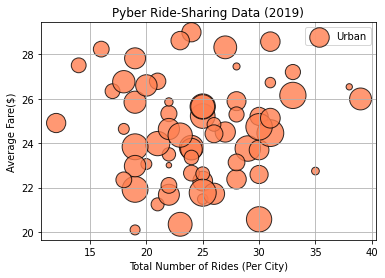

In [57]:
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

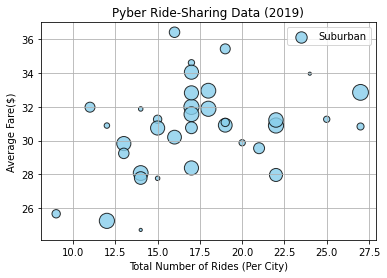

In [58]:
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

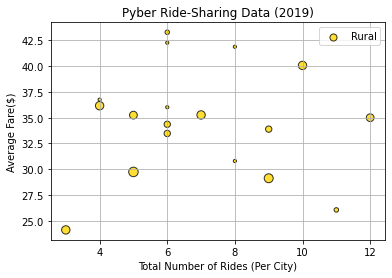

In [59]:
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

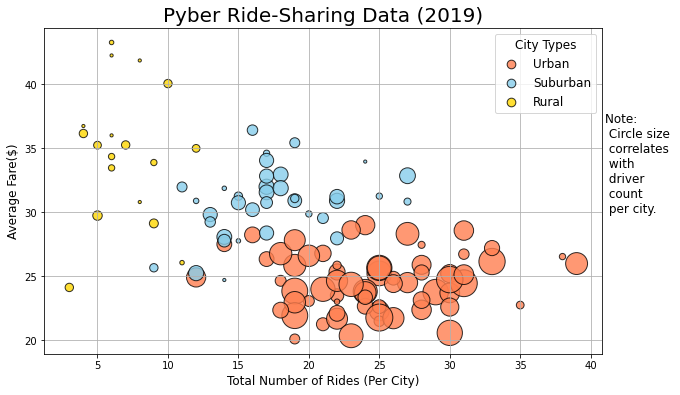

In [106]:
plt.subplots(figsize=(10, 6), facecolor="white")
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(41, 30, "Note: \n Circle size \n correlates \n with \n driver \n count \n per city.", fontsize="12")



plt.savefig("analysis/fig1.png")

In [111]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [112]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [113]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [114]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round (rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [115]:
urban_ride_count.median()

24.0

In [116]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [117]:
suburban_ride_count.mode()

0    17
dtype: int64

In [123]:
from statistics import mode


mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride count for urban trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride count for urban trips is {mode_urban_ride_count}.")

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride count for suburban trips is {median_suburban_ride_count:.2f}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride count for suburban trips is {mode_suburban_ride_count}.")

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride count for rural trips is {median_rural_ride_count:.2f}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride count for rural trips is {mode_rural_ride_count}.")



The mean for the ride counts for urban trips is 24.62.
The median for the ride count for urban trips is 24.00.
The mode for the ride count for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
The mean for the ride counts for suburban trips is 17.36.
The median for the ride count for suburban trips is 17.00.
The mode for the ride count for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
The mean for the ride counts for rural trips is 6.94.
The median for the ride count for rural trips is 6.00.
The mode for the ride count for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [125]:
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64